In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
#warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('winequality-red.csv')

# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_corr = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol', 'quality']].dropna().corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

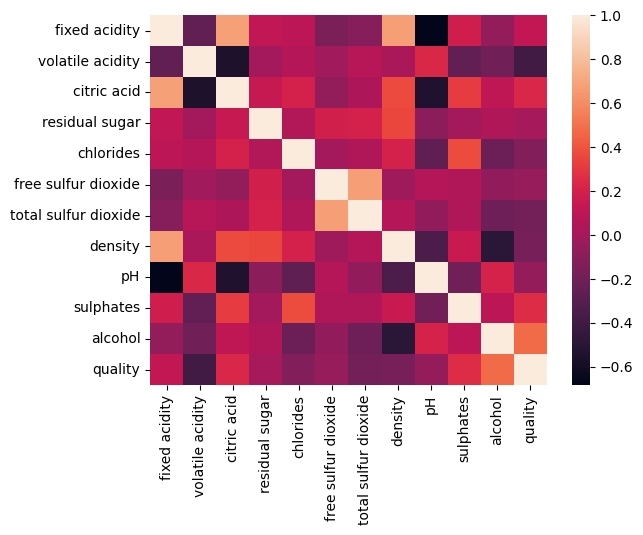

In [6]:
sns.heatmap(wine_corr)

**Key Features:**
- fixed acidity
- citric acid
- sulphates
- alcohol<br>
All of the above features play an important role in deciding quality of the wine. It is also show in correlation heatmap above.

Acidity levels affect the overall taste and balance of the wine. Citric acid contributes to freshness and flavor. Sulphates contribute to aroma and act as antioxidants. Alcohol content affects the wine's body, flavor, and overall impact.

# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [7]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in wine quality dataset.

**Mean/Median Imputation:**

- Advantage: Simple and quick to implement. Does not distort the distribution of the feature.
- Disadvantage: Ignores potential relationships between variables. Can lead to biased estimates if missingness is not random.

**Mode Imputation:**

- Advantage: Suitable for categorical data. Preserves the mode of the distribution.
- Disadvantage: May not accurately represent the underlying distribution. Ignores relationships between features.

# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [8]:
stud = pd.read_csv('stud.csv')
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
stud['Total_Score'] = stud['math_score'] + stud['math_score'] + stud['math_score']
stud['Average'] = stud['Total_Score'] / 3
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0
1,female,group C,some college,standard,completed,69,90,88,207,69.0
2,female,group B,master's degree,standard,none,90,95,93,270,90.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,141,47.0
4,male,group C,some college,standard,none,76,78,75,228,76.0


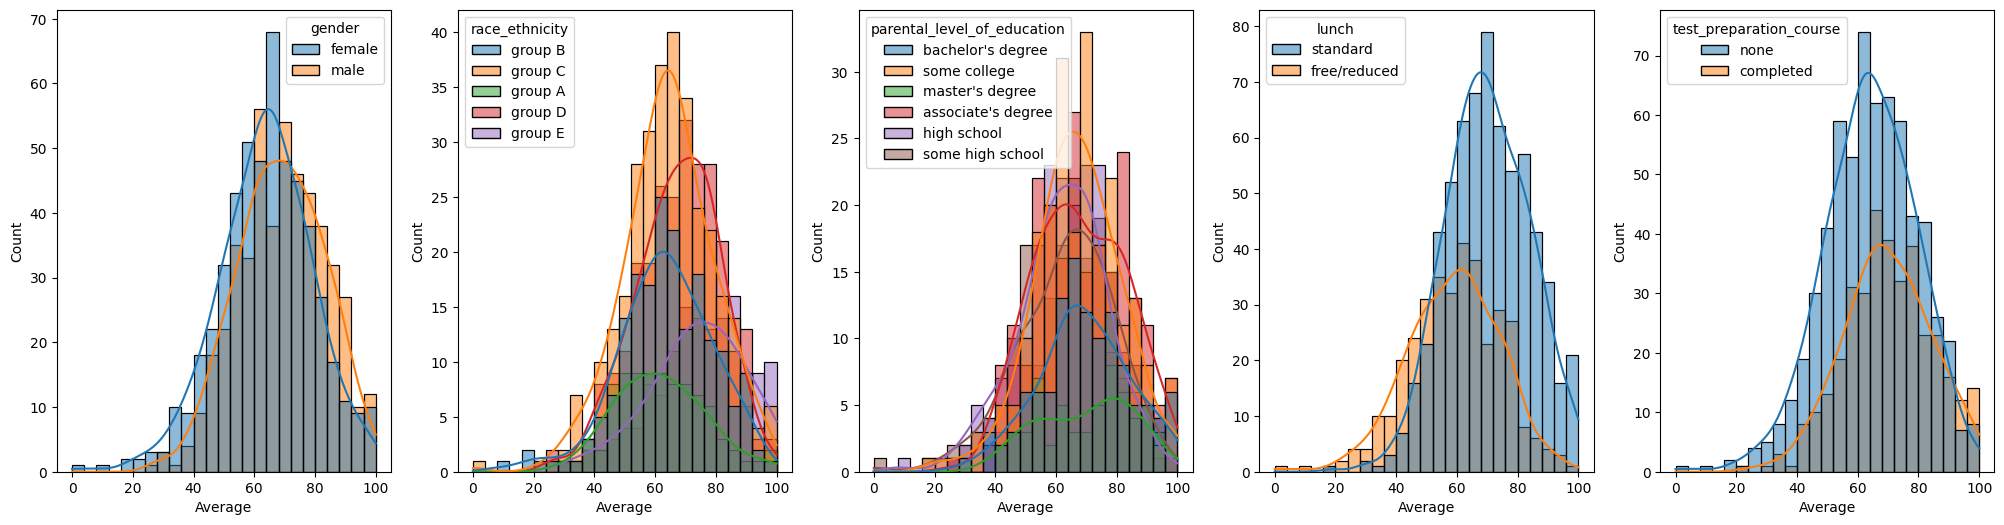

In [10]:
plt.subplots(1, 5, figsize=(25, 6))

plt.subplot(151)
sns.histplot(data=stud, x='Average', hue='gender', kde=True)

plt.subplot(152)
sns.histplot(data=stud, x='Average', hue='race_ethnicity', kde=True)

plt.subplot(153)
sns.histplot(data=stud, x='Average', hue='parental_level_of_education', kde=True)

plt.subplot(154)
sns.histplot(data=stud, x='Average', hue='lunch', kde=True)

plt.subplot(155)
sns.histplot(data=stud, x='Average', hue='test_preparation_course', kde=True)

plt.show()

- In the above example, we have created two new rows - total score and average. This helps us to plot data
- From graph - 1 we can observe that female students performs better than male student.
- From graph - 2 we can observe group C performs better in exam compared to different groups.
- From graph - 3 we can ovserve students with parents who have master's degree performs bad while students with some parents from  some college performs better.
- From graph - 4 we can observe that students who take standard lunch performs better than students who take free/reduced lunch.
- From graph - 5 we can observe that students who have not taken test preparation course performs better in exam.

We can conclude that major things affecting student's perfomance are : 
- race
- lunch
- test preparation course

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [11]:
stud.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
Total_Score                    0
Average                        0
dtype: int64

In [12]:
stud.duplicated().sum()

0

In terms of feature engineering I didn't had to do much as data was already clean. It didn't contain any null values or duplicate values.

In [13]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Total_Score                  1000 non-null   int64  
 9   Average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


I found Total_Score by adding math_score, writing_score and reading_score. After getting Total_Score I found average marks of each student. After that I plot those data to perform analysis on them.

# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

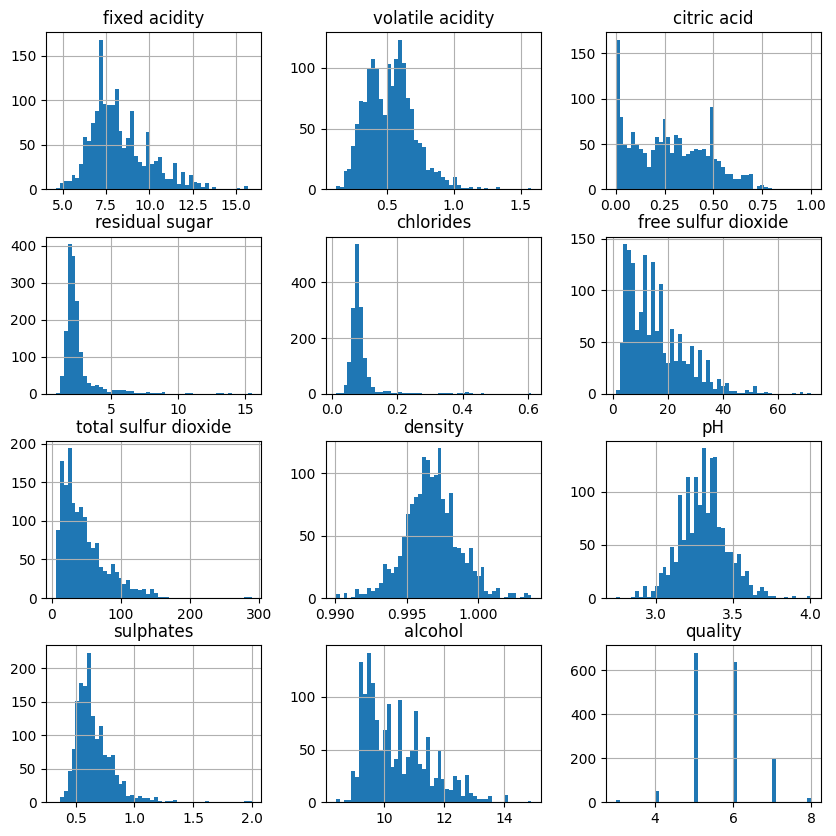

In [14]:
wine.hist(figsize=(10,10), bins=50)
plt.show()

From the histograms, we can see that some features exhibit non-normality, including:

- volatile acidity
- citric acid
- free sulfur dioxide
- total sulfur dioxide <br>
To improve normality, we can apply various transformations to these features. Here are some possible transformations:
<br> <br>
**Log transformation**: This can be applied to features with right-skewed distributions, such as residual sugar, free sulfur dioxide, and total sulfur dioxide. The log transformation can help reduce the effect of extreme values and make the distribution more symmetric.
**Square root transformation**: This can be applied to features with highly skewed distributions, such as volatile acidity and citric acid. The square root transformation can help reduce the skewness and make the distribution more bell-shaped.

# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [43]:
X = wine.drop('quality', axis=1)

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [46]:
explained_variance_ratio = pca.explained_variance_ratio_

In [47]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_needed = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Number of principal components to explain 90% variance: {num_components_needed}")

Number of principal components to explain 90% variance: 7
